#### **In this task**:
We used a dataset called MWD with four weather classes: 'cloudy', 'rain', 'shine', and 'sunrise' (represented as 0, 1, 2, and 3).
We applied three different models:
1. DenseNet 201v2
2. VGG16
3. ResNet 101v2

Each model was trained for 10 epochs. After training, we compared the results. also we plot training accuracy, loss, and confusion matrix for each model.

In [ ]:
# from google.colab import drive
# drive.mount("/content/mydrive")

In [ ]:
# --set your path
# %cd ..

In [ ]:
!unzip MWD.zip

# **import libraries**

In [5]:
import cv2
import os, numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D,Input,Multiply, GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D, Softmax, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.resnet import ResNet152
# from tensorflow.keras.applications.nasnet import NasNetLarge
import keras


from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# **Preprocessing dataset**

In [6]:
train_data_dir = 'MWD/train/'
test_data_dir = 'MWD/test/'

labs = {'cloudy':0, 'rain':1, 'shine':2, 'sunrise':3}
image_size = (224, 224)


def load_data(main_root):
    imList = []
    lbList = []

    for lb_name in os.listdir(main_root):
        new_path=os.path.join(main_root,lb_name)

        if os.path.isdir(new_path): # if is a directory or not
            for filename in os.listdir(new_path):
                im_path = os.path.join(new_path,filename)
                img = cv2.imread(im_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    #resize images
                    resized_image=cv2.resize(img,(image_size))
                    #normalize images
                    norm_img = cv2.normalize(resized_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    imList.append(norm_img)
                    lbList.append(labs[lb_name])

    return imList, lbList

train_im, train_lb = load_data(train_data_dir)
test_im, test_lb = load_data(test_data_dir)

In [7]:
train_im = np.array(train_im)
test_im = np.array(test_im)
print("train data shape:", train_im.shape)
print("test data shape", test_im.shape)

train data shape: (845, 224, 224, 3)
test data shape (278, 224, 224, 3)


In [8]:
from sklearn.utils import shuffle
train_im,train_lb = shuffle(train_im, train_lb, random_state=2)
test_im,test_lb = shuffle(test_im, test_lb, random_state=2)

train_lb = tf.keras.utils.to_categorical(train_lb,4)
test_lb = tf.keras.utils.to_categorical(test_lb,4)

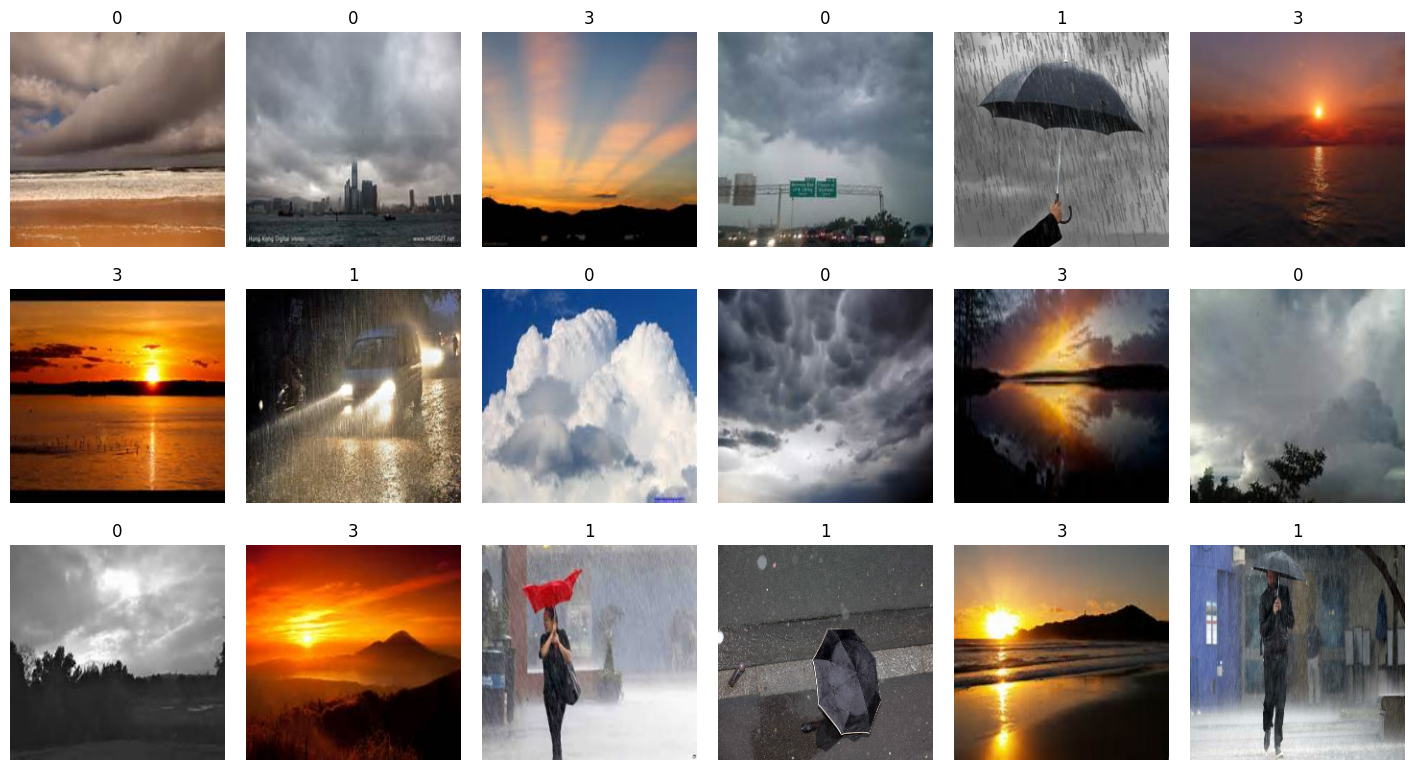

In [9]:
import matplotlib.pyplot as plt
import numpy as np


indices = [0, 20, 30, 50, 100, 55, 1, 18, 33, 46, 170, 57, 5, 25, 35, 40, 200, 10]

fig, axs = plt.subplots(3, 6, figsize=(18, 10))

for i, ax in enumerate(axs.flat):
    index = indices[i]
    ax.imshow(test_im[index])
    ax.set_title(str(np.argmax(test_lb[index])))
    ax.set_axis_off()

plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()


# **Classification Models**

In [12]:
# --init--

width=224
height=224
channel=3

my_epochs=10
my_batch_size=64

num_classes = 4
algorithms_name=['DenseNet201', 'VGG16', 'ResNet101']

alg_num=len(algorithms_name)
accuracy_array=np.zeros(alg_num)
precision_array=np.zeros(alg_num)
recall_array=np.zeros(alg_num)
f1_score_array=np.zeros(alg_num)

> ## DenseNet201

In [13]:
base_model = tf.keras.applications.densenet.DenseNet201(weights="imagenet",include_top=False,input_shape =(width, height,channel))

for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the NasNetLarge base model
Dense201_model = Sequential()
Dense201_model.add(base_model)
Dense201_model.add(GlobalAveragePooling2D())
Dense201_model.add(Dense(256, activation='relu'))
Dense201_model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.001)

Dense201_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Dense201_hist = Dense201_model.fit(train_im, train_lb, epochs=my_epochs, batch_size=my_batch_size, validation_split=0.2)

Epoch 1/10
11/11 [==============================] - 24s 899ms/step - loss: 0.6691 - accuracy: 0.7278 - val_loss: 0.2812 - val_accuracy: 0.9290
Epoch 2/10
11/11 [==============================] - 4s 400ms/step - loss: 0.1841 - accuracy: 0.9467 - val_loss: 0.2227 - val_accuracy: 0.9172
Epoch 3/10
11/11 [==============================] - 4s 415ms/step - loss: 0.0933 - accuracy: 0.9793 - val_loss: 0.1768 - val_accuracy: 0.9527
Epoch 4/10
11/11 [==============================] - 4s 340ms/step - loss: 0.0584 - accuracy: 0.9882 - val_loss: 0.1634 - val_accuracy: 0.9527
Epoch 5/10
11/11 [==============================] - 5s 452ms/step - loss: 0.0444 - accuracy: 0.9911 - val_loss: 0.1529 - val_accuracy: 0.9704
Epoch 6/10
11/11 [==============================] - 4s 375ms/step - loss: 0.0332 - accuracy: 0.9956 - val_loss: 0.1528 - val_accuracy: 0.9704
Epoch 7/10
11/11 [==============================] - 4s 350ms/step - loss: 0.0266 - accuracy: 0.9941 - val_loss: 0.1450 - val_accuracy: 0.9645
Epoch

In [14]:
Dense201_model.evaluate(train_im, train_lb)

27/27 [==============================] - 16s 339ms/step - loss: 0.0403 - accuracy: 0.9929


[0.040296219289302826, 0.9928994178771973]

In [16]:
y_pred_Dense201=Dense201_model.predict(test_im,verbose=0)
y_pred_Dense201=np.argmax(y_pred_Dense201, axis=1)

y_test = [np.argmax(element) for element in test_lb]
accuracy_score(y_test, y_pred_Dense201)

classfi_report=classification_report(y_test, y_pred_Dense201,output_dict=True)

K=0
accuracy_array[K] =accuracy_score(y_test, y_pred_Dense201)
precision_array[K] = classfi_report['macro avg']['precision']
recall_array[K] = classfi_report['macro avg']['recall']
f1_score_array[K] = classfi_report['macro avg']['f1-score']
print("accuracy : %.3f" % accuracy_array[K])
print("precision: %.3f" % precision_array[K])
print("recall: %.3f" % recall_array[K])
print("f1 score: %.3f" % f1_score_array[K])

accuracy : 0.960
precision: 0.960
recall: 0.959
f1 score: 0.960


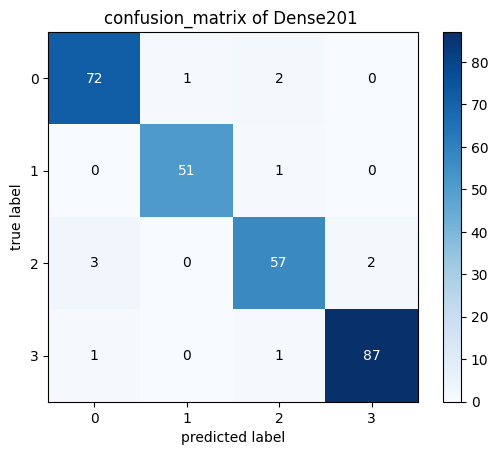

In [17]:
Con_matrix=confusion_matrix(y_test, y_pred_Dense201)
fig, ax = plot_confusion_matrix(conf_mat=Con_matrix,
                            show_absolute=True,
                            show_normed=False,
                            colorbar=True)

ax.set_title('confusion_matrix of Dense201 ')
plt.show()

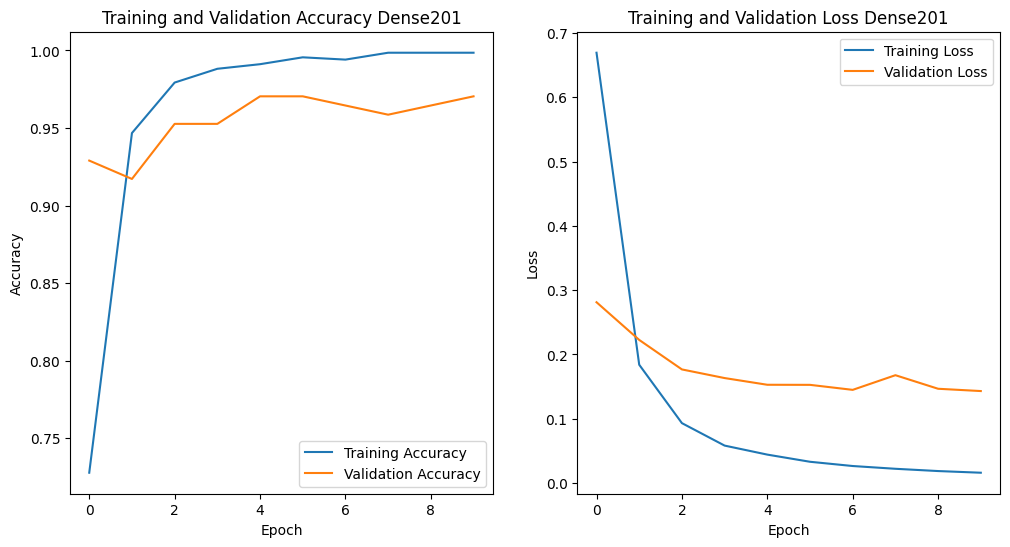

In [18]:
# training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(Dense201_hist.history['accuracy'], label='Training Accuracy')
plt.plot(Dense201_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Dense201')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# training and validation loss
plt.subplot(1, 2, 2)
plt.plot(Dense201_hist.history['loss'], label='Training Loss')
plt.plot(Dense201_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Dense201')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

> ## VGG16

In [19]:
base_model = tf.keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,input_shape =(width, height,channel))

for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the NasNetLarge base model
vgg16_model = Sequential()
vgg16_model.add(base_model)
vgg16_model.add(GlobalAveragePooling2D())
vgg16_model.add(Dense(256, activation='relu'))

vgg16_model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.001)
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vgg16_hist = vgg16_model.fit(train_im, train_lb, epochs=my_epochs, batch_size=my_batch_size, validation_split=0.2)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
11/11 [==============================] - 35s 2s/step - loss: 1.3295 - accuracy: 0.3447 - val_loss: 1.1215 - val_accuracy: 0.5148
Epoch 2/10
11/11 [==============================] - 4s 409ms/step - loss: 1.0185 - accuracy: 0.6760 - val_loss: 0.9216 - val_accuracy: 0.6982
Epoch 3/10
11/11 [==============================] - 4s 364ms/step - loss: 0.8174 - accuracy: 0.7175 - val_loss: 0.7669 - val_accuracy: 0.7870
Epoch 4/10
11/11 [==============================] - 4s 362ms/step - loss: 0.6826 - accuracy: 0.8092 - val_loss: 0.6587 - val_accuracy: 0.7929
Epoch 5/10
11/11 [==============================] - 4s 348ms/step - loss: 0.5963 - accuracy: 0.8077 - val_loss: 0.5873 - val_accuracy: 0.8343
Epoch 6/10
11/11 [==============================] - 4s 394ms/step - loss: 0.5288 - accuracy: 0.8299 - val_loss: 0.5375 - val_accuracy: 0.8402
Epoch 7/10
11/11 [==============================] - 4s 395ms/step - loss: 0.4817 - ac

In [20]:
vgg16_model.evaluate(test_im, test_lb)

9/9 [==============================] - 13s 793ms/step - loss: 0.4063 - accuracy: 0.8669


[0.40632981061935425, 0.866906464099884]

In [21]:
y_pred_VGG16=vgg16_model.predict(test_im,verbose=0)
y_pred_VGG16=np.argmax(y_pred_VGG16, axis=1)

y_test = [np.argmax(element) for element in test_lb]

accuracy_score(y_test, y_pred_VGG16)

K=1
classfi_report=classification_report(y_test, y_pred_VGG16,output_dict=True)

accuracy_array[K] =accuracy_score(y_test, y_pred_VGG16)
precision_array[K] = classfi_report['macro avg']['precision']
recall_array[K] = classfi_report['macro avg']['recall']
f1_score_array[K] = classfi_report['macro avg']['f1-score']
print("\accuracy : %.3f" % accuracy_array[K])
print("precision: %.3f" % precision_array[K])
print("recall: %.3f" % recall_array[K])
print("f1 score: %.3f" % f1_score_array[K])

ccuracy : 0.867
precision: 0.896
recall: 0.860
f1 score: 0.866


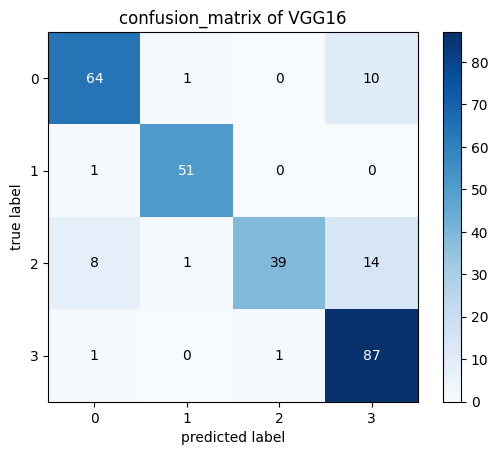

In [22]:
Con_matrix=confusion_matrix(y_test, y_pred_VGG16)
fig, ax = plot_confusion_matrix(conf_mat=Con_matrix,
                            show_absolute=True,
                            show_normed=False,
                            colorbar=True)

ax.set_title('confusion_matrix of VGG16')
plt.show()

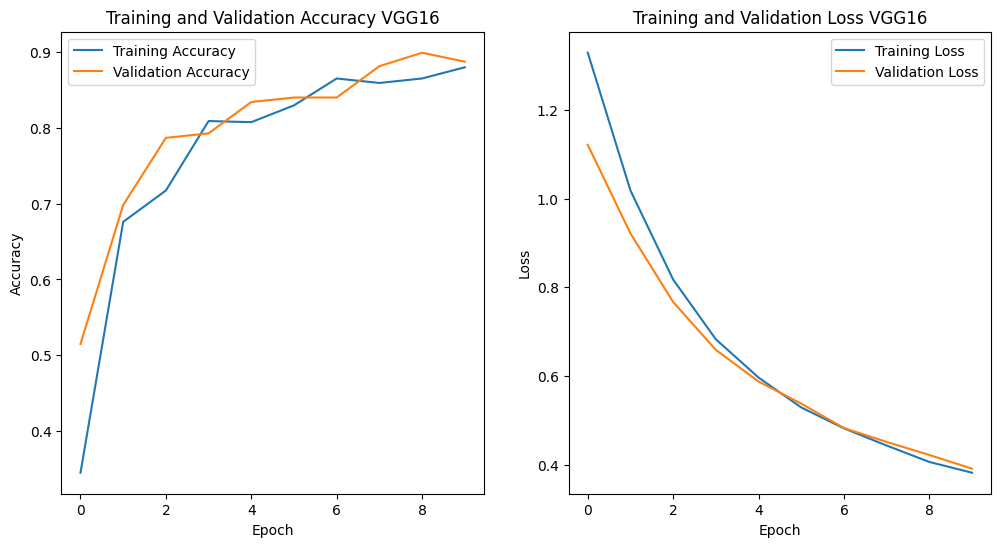

In [24]:
# training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(vgg16_hist.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy VGG16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# training and validation loss
plt.subplot(1, 2, 2)
plt.plot(vgg16_hist.history['loss'], label='Training Loss')
plt.plot(vgg16_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss VGG16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

> ## ResNet101

In [25]:
base_model = tf.keras.applications.resnet_v2.ResNet101V2(weights="imagenet",include_top=False,input_shape =(width, height,channel))

for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the NasNetLarge base model
ResNet101V2_model = Sequential()
ResNet101V2_model.add(base_model)
ResNet101V2_model.add(GlobalAveragePooling2D())
ResNet101V2_model.add(Dense(256, activation='relu'))

ResNet101V2_model.add(Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.001)

ResNet101V2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNet101V2_hist = ResNet101V2_model.fit(train_im, train_lb, epochs=my_epochs, batch_size=my_batch_size, validation_split=0.2)

171317808/171317808 [==============================] - 1s 0us/step
Epoch 1/10
11/11 [==============================] - 23s 1s/step - loss: 0.6403 - accuracy: 0.7707 - val_loss: 0.2766 - val_accuracy: 0.9053
Epoch 2/10
11/11 [==============================] - 5s 464ms/step - loss: 0.1359 - accuracy: 0.9556 - val_loss: 0.2566 - val_accuracy: 0.9053
Epoch 3/10
11/11 [==============================] - 5s 417ms/step - loss: 0.0702 - accuracy: 0.9749 - val_loss: 0.2005 - val_accuracy: 0.9349
Epoch 4/10
11/11 [==============================] - 4s 415ms/step - loss: 0.0461 - accuracy: 0.9852 - val_loss: 0.1934 - val_accuracy: 0.9408
Epoch 5/10
11/11 [==============================] - 5s 451ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.1836 - val_accuracy: 0.9408
Epoch 6/10
11/11 [==============================] - 4s 398ms/step - loss: 0.0246 - accuracy: 0.9941 - val_loss: 0.1847 - val_accuracy: 0.9408
Epoch 7/10
11/11 [==============================] - 4s 404ms/step - loss: 0.0182 - 

In [26]:
ResNet101V2_model.evaluate(test_im, test_lb)

9/9 [==============================] - 6s 417ms/step - loss: 0.0756 - accuracy: 0.9892


[0.07557898759841919, 0.9892086386680603]

In [27]:
y_pred_ResNet101V2 = ResNet101V2_model.predict(test_im,verbose=0)
y_pred_ResNet101V2 = np.argmax(y_pred_ResNet101V2, axis=1)

y_test = [np.argmax(element) for element in test_lb]
accuracy_score(y_test, y_pred_ResNet101V2)


classfi_report=classification_report(y_test, y_pred_ResNet101V2,output_dict=True)

K=2

accuracy_array[K] =accuracy_score(y_test, y_pred_ResNet101V2)
precision_array[K] = classfi_report['macro avg']['precision']
recall_array[K] = classfi_report['macro avg']['recall']
f1_score_array[K] = classfi_report['macro avg']['f1-score']
print("accuracy : %.3f" % accuracy_array[K])
print("precision: %.3f" % precision_array[K])
print("recall: %.3f" % recall_array[K])
print("f1 score: %.3f" % f1_score_array[K])

accuracy : 0.989
precision: 0.989
recall: 0.989
f1 score: 0.989


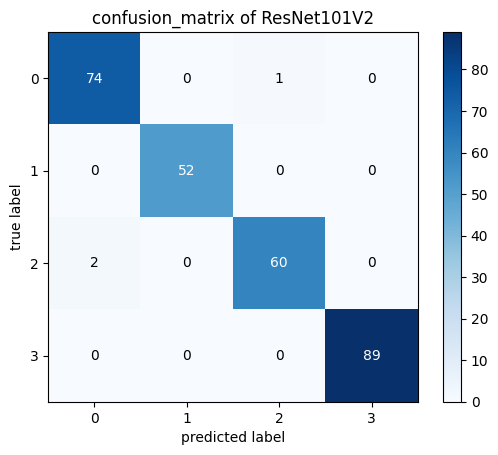

In [28]:
Con_matrix=confusion_matrix(y_test, y_pred_ResNet101V2)
fig, ax = plot_confusion_matrix(conf_mat=Con_matrix,
                            show_absolute=True,
                            show_normed=False,
                            colorbar=True)
ax.set_title('confusion_matrix of ResNet101V2')
plt.show()

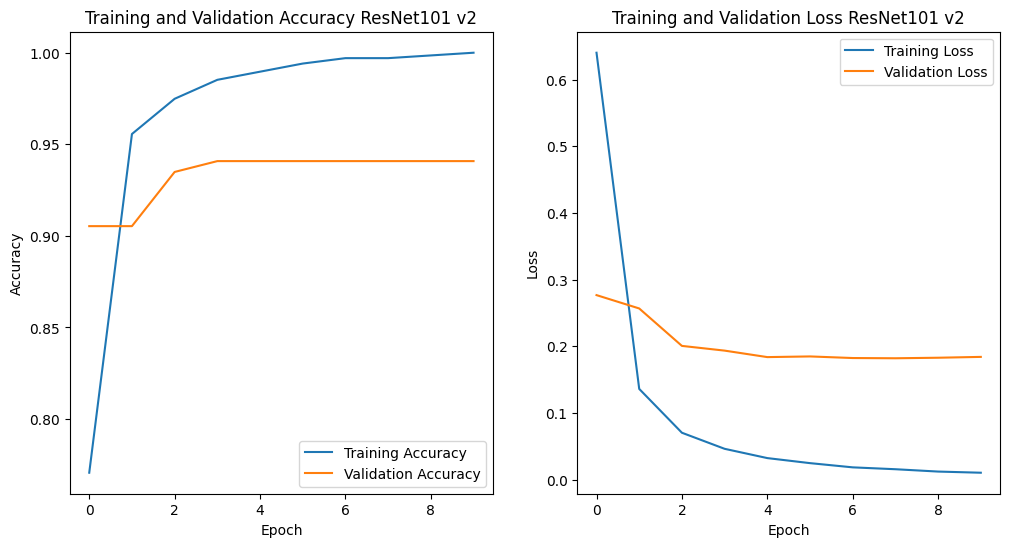

In [29]:
# training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ResNet101V2_hist.history['accuracy'], label='Training Accuracy')
plt.plot(ResNet101V2_hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy ResNet101 v2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# training and validation loss
plt.subplot(1, 2, 2)
plt.plot(ResNet101V2_hist.history['loss'], label='Training Loss')
plt.plot(ResNet101V2_hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss ResNet101 v2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

> # **Comparing the results of models**

--------------------result--------------------------


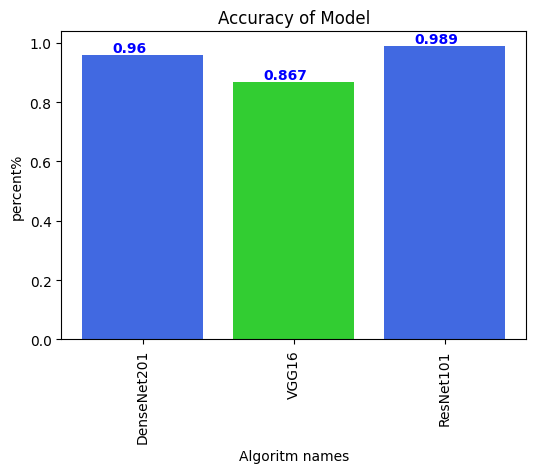

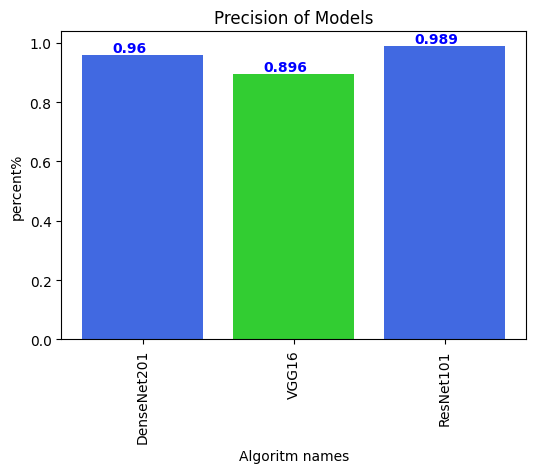

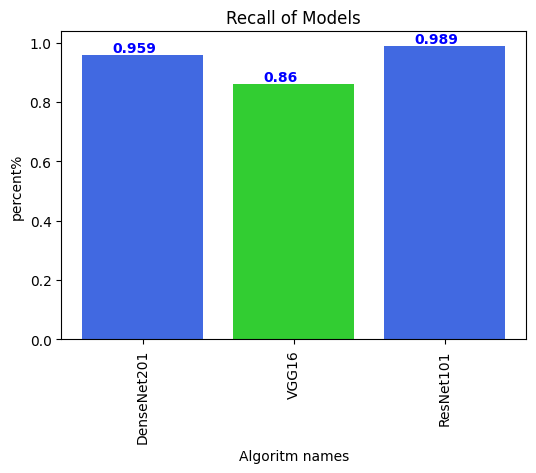

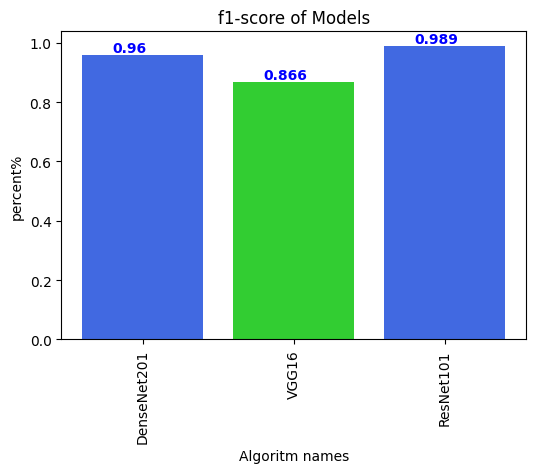

In [30]:
#@title Default title text

H=6
L=4

print('--------------------result--------------------------')
fig1=plt.figure(figsize=(H, L)) #
plt.bar(algorithms_name, accuracy_array,color = ['royalblue', 'limegreen'])
plt.xticks(algorithms_name, rotation=90)
plt.ylabel('percent%')
plt.title('Accuracy of Model')
plt.xlabel("Algoritm names")
for i, v in enumerate(accuracy_array):
    v=round(v,3)
    plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
fig1.show()


fig2=plt.figure(figsize=(H, L)) #
plt.bar(algorithms_name, precision_array,color = ['royalblue', 'limegreen'])
plt.xticks(algorithms_name, rotation=90)
plt.ylabel('percent%')
plt.title('Precision of Models')
plt.xlabel("Algoritm names")
for i, v in enumerate(precision_array):
    v=round(v,3)
    plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
fig2.show()




fig3=plt.figure(figsize=(H, L)) #
plt.bar(algorithms_name, recall_array,color = ['royalblue', 'limegreen'])
plt.xticks(algorithms_name, rotation=90)
plt.ylabel('percent%')
plt.title('Recall of Models')
plt.xlabel("Algoritm names")
for i, v in enumerate(recall_array):
    v=round(v,3)
    plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
fig3.show()



fig4=plt.figure(figsize=(H, L)) #
plt.bar(algorithms_name, f1_score_array,color = ['royalblue', 'limegreen'])
plt.xticks(algorithms_name, rotation=90)
plt.ylabel('percent%')
plt.title('f1-score of Models')
plt.xlabel("Algoritm names")
for i, v in enumerate(f1_score_array):
    v=round(v,3)
    plt.text(i-0.2 , v+0.01 , str(v), color='blue', fontweight='bold')
fig4.show()

# **Interface**

In [39]:
np.array([test_im[0]]).shape

(1, 224, 224, 3)

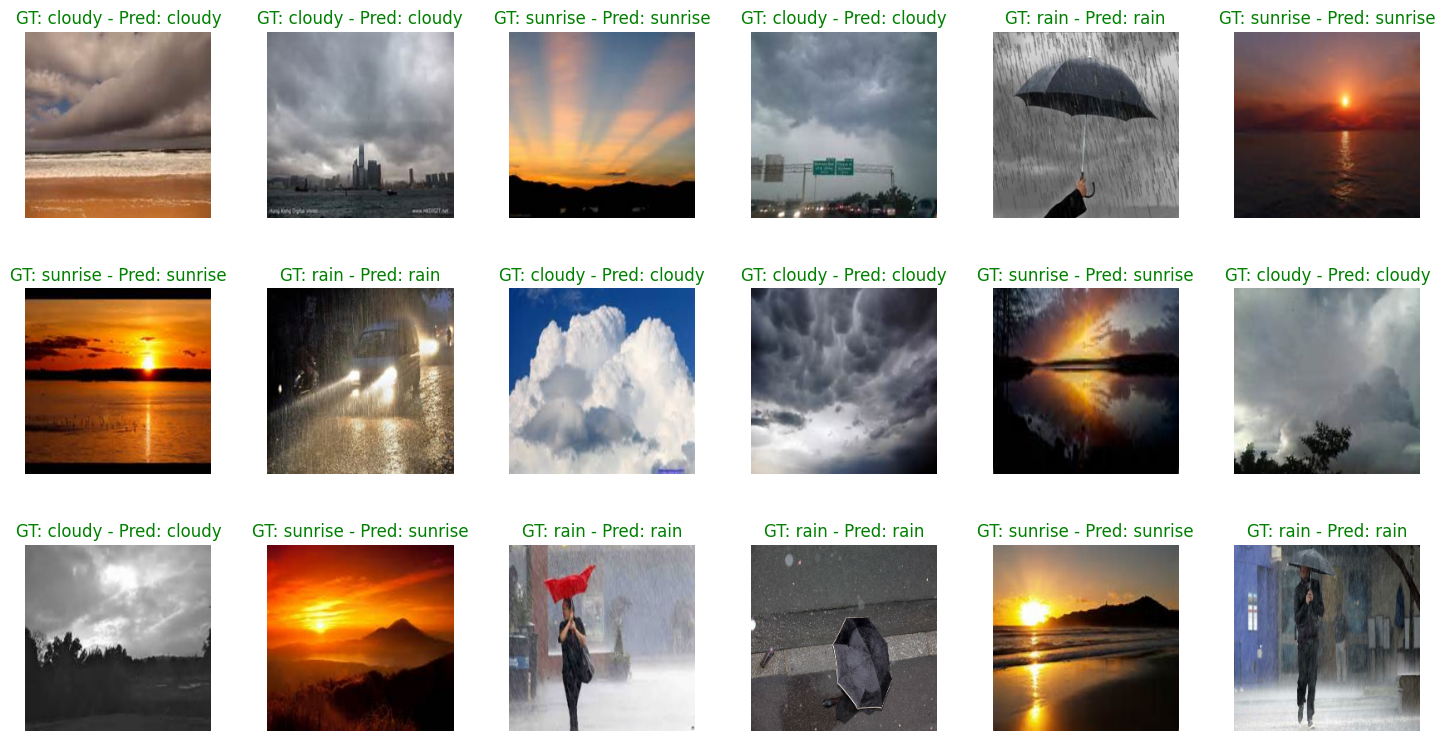

In [56]:
indices = [0, 20, 30, 50, 100, 55, 1, 18, 33, 46, 170, 57, 5, 25, 35, 40, 200, 10]
reverse_labs = {v: k for k, v in labs.items()}


fig, axs = plt.subplots(3, 6, figsize=(18, 10))

for i, ax in enumerate(axs.flat):
    index = indices[i]
    ax.imshow(test_im[index])

    y_pred = ResNet101V2_model.predict(np.array([test_im[index]]), verbose=0)
    y_pred = np.argmax(y_pred)


    GT = reverse_labs.get(np.argmax(test_lb[index]))
    pred = reverse_labs.get(y_pred)
    if GT == pred:
        c = 'green'
    else:
        c = 'red'
    ax.set_title(f"GT: {GT} - Pred: {pred}", color=c)
    ax.set_axis_off()

plt.subplots_adjust(wspace=0.3, hspace=0)
plt.show()
